**this is a template notebook for Assignment 3 on Classification. To get a 60 you will need to complete chapter 1.
    The template is also just an indication. You can add more cells if needed, and can of course delete this line**

# <span style ='background:yellow'>Assignment Week 6 Clustering
Author: <span style='background:yellow'>Mohaymen Sameen</span><br>
Student number: <span style='background:yellow'>627650</span><br>
Date: <span style='background:yellow'>2-June-2021</span>

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* **Sklearn,
  matplotlib,
  yellowbrick,
  scipy,
  pyclustering**

From these we will need the following libraries:

In [1]:
# enter here all those 'from .... import ....'

# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')

# pandas as pd
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')

# pyplot as plt
try:
    from matplotlib import pyplot as plt
    print('matplotlib already installed, only imported')
except:
    !pip install matplotlib
    from matplotlib import pyplot as plt
    print('matplotlib was not installed, installed and imported')
    
# yellowbrick
try:
    from yellowbrick.cluster import KElbowVisualizer
    print('matplotlib already installed, only imported')
except:
    !pip install yellowbrick
    from yellowbrick.cluster import KElbowVisualizer
    print('matplotlib was not installed, installed and imported')
    
# sklearn
try:
    from sklearn import datasets
    print('sklearn already installed, only imported')
except:
    !pip install sklearn
    from sklearn import datasets
    print('sklearn was not installed, installed and imported')

# the above already checks for sklearn, so the following should not be a problem.
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, AffinityPropagation, SpectralClustering, MiniBatchKMeans, AgglomerativeClustering, DBSCAN

# scipy
try:
    from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
    print('scipy already installed, only imported')
except:
    !pip install scipy
    from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
    print('scipy was not installed, installed and imported')

# pyclustering
try:
    from pyclustering.cluster.kmedoids import kmedoids
    print('pyclustering already installed, only imported')
except:
    !pip install pyclustering
    from pyclustering.cluster.kmedoids import kmedoids
    print('pyclustering was not installed, installed and imported')
    
# hdbscan
try:
    import hdbscan
    print('hdbscan already installed, only imported')
except:
    !pip install hdbscan
    import hdbscan
    print('hdbscan was not installed, installed and imported')  

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import hdbscan
import seaborn as sns
from sklearn.preprocessing import StandardScaler

NumPy already installed, only imported
pandas already installed, only imported
matplotlib already installed, only imported
matplotlib already installed, only imported
sklearn already installed, only imported
scipy already installed, only imported
pyclustering already installed, only imported
hdbscan already installed, only imported


# 1. The Soccer Classification

In the Jupyter Notebook from lecture 6 there was one exercise using the k-means clustering, using the Soccer data. In this chapter we'll repeat that and also see how the other models perform with this data.

First we'll need to load the data itself.

In [2]:
#reading data
my_data = pd.read_csv("Soccer2019C.csv", sep=',', skipinitialspace=True) 

We were interested to find any classes in 'Finishing' and 'HeadingAccuracy'. So lets select those from the data.

In [3]:
# Set the two variables as X
soccX =my_data[["Finishing", "HeadingAccuracy"]]

# Remove missing values
soccX=soccX.dropna()

A visual might be nice, so lets show the scatterplot of these two:

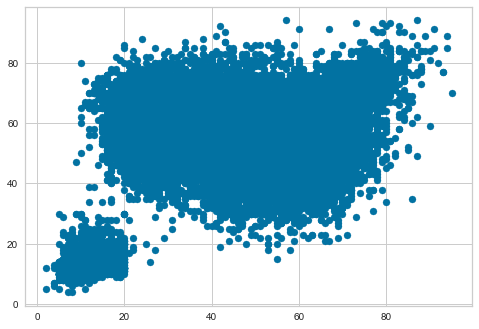

In [4]:
# Scatterplot
plt.scatter(soccX["Finishing"],soccX["HeadingAccuracy"])

**<span style='background:yellow'>As you can probably see, we have around 2 main clusters which are clear to us. These clusters represent the players' finishing and the heading accuracy</span>**

Now that we have the data, lets begin with the classification.

# 1.1. K-Means

The first, and probably most famous, technique discussed was the k-means. 

**<span style='background:yellow'>K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.The objective of K-means is to group similar data points together and discover any underlying patterns. A cluster refers to a collection of data points concentrated together because of certain similarities </span>**. 

We think there are two clusters, so lets first use that and set the k-means model using k=2. We'll use Elkan's algorithm, rather than full just to speed things along.

In [5]:
# creating and fitting the k-means model (with elkan and full) 
kmeans = KMeans(init='random', algorithm='elkan', n_clusters=2, random_state=0)
kmeans.fit(soccX)

KMeans(algorithm='elkan', init='random', n_clusters=2, random_state=0)

Great, now lets see the result...

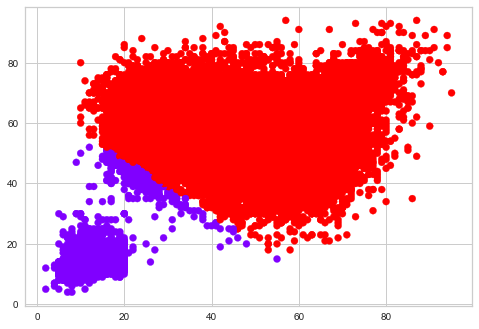

In [6]:
#scatterplot with the classification
plt.scatter(soccX["Finishing"],soccX["HeadingAccuracy"], c=kmeans.labels_, cmap='rainbow')

**<span style='background:yellow'>The scatterplot shows us the clustering of players based on finishing and heading accuracy. We mentioned earlier that we could see 2 clusters. Based on the first scatterplot. Now in this we can see the 2 clusters clearly. One cluster is in purple and the other one is in red. The K-means technique in data mining starts with a first group of randomly picked centroids, which serve as the starting points for each cluster, and then performs iterative (repetitive) calculations to optimize the centroids' placements.</span>**

Perhaps another initialization method works better. K-means++ is quite popular. 

**<span style='background:yellow'>K-means and K-means++ are both clustering approaches that fall under the category of unsupervised learning. The selection of the centroids around which the clustering takes place is the fundamental distinction between the two techniques.
K means++ eliminates the disadvantage of K means, which is that it is dependent on centroid initialization.</span>**.

Lets see:

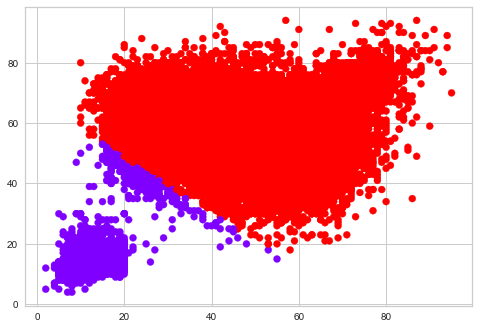

In [7]:
# creating and fitting the k-means++ (elkan) and also show the scatterplot
kmeans = KMeans(init='k-means++',algorithm='elkan', n_clusters=2, random_state=0)
kmeans.fit(soccX)

plt.scatter(soccX["Finishing"],soccX["HeadingAccuracy"], c=kmeans.labels_, cmap='rainbow')

**<span style='background:yellow'>From this scatterplot, you might not notice any differences from this and the K means scatterplot. Also you can probably see that the purple cluster is mixing in with the red. That doesn't really show a clear distinction between the two clusters.</span>**

Perhaps the k=2 is wrong. We could try to iterate over different values of k and measure the performance with a few different metrics.

We'll use the same function as in the Jupyter Notebook from the lecture:

In [8]:
# elbowPlot function
def elbowPlot(data, model, kRange):

    # set the plotting stage for later
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, constrained_layout=True,figsize=(15,5))

    # Using the Distortion measure:
    visualizer = KElbowVisualizer(model, k=kRange, metric='distortion', ax=ax1)
    chPlot=visualizer.fit(data)
    ax1.set_title('Distortion')

    # Using the Calinski-Harabasz measure
    visualizer = KElbowVisualizer(model, k=kRange, metric='calinski_harabasz', ax=ax2)
    chPlot=visualizer.fit(data)
    ax2.set_title('Calinski-Harabasz')

    # Using the Silhouette measure
    visualizer = KElbowVisualizer(model, k=kRange, metric='silhouette', ax=ax3)
    chPlot=visualizer.fit(data)
    ax3.set_title('Silhouette')

    # Show the results
    plt.show()

Now lets see what this gives for our Soccer data:

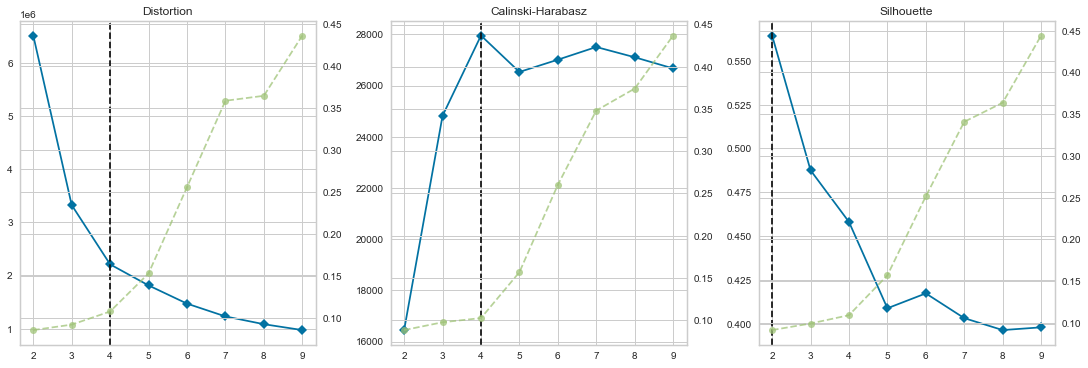

In [9]:
# the three elbow plots

#Function
elbowPlot(soccX, kmeans, (2,10))

**<span style='background:yellow'>What you see are the three metrics and the three elbow plots. The first one is the distortion scoring parameter metric, it sets to compute the sum of squared distances between each point and its assigned center. The second one is the calinski harabasz score and it computes the dispersion ratio between and within clusters. The last one is the silhouette score which computes the average Silhouette Coefficient across all samples. Now that the 2 elbow plots (Distortion and Calinski-Harabasz) show the same K value which is 4, we will use that one now.</span>** 

Lets see what happens if we use the recommended k value:

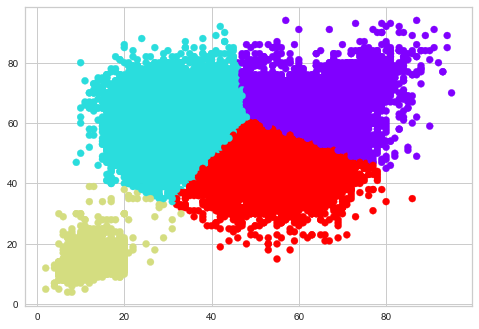

In [10]:
# creating and fitting the k-means++ (full) and also showing the scatterplot with the k value from the elbow plot

#Using k=4 as it is the recommended value
kmeans = KMeans(init='k-means++',algorithm='full', n_clusters=4, random_state=0)
kmeans.fit(soccX)

plt.scatter(soccX["Finishing"],soccX["HeadingAccuracy"], c=kmeans.labels_, cmap='rainbow')

**<span style='background:yellow'>Now after applying the recommended K value from the elbow plots, we can see more clusters now. Since we specified K=4, we now have 4 clusters. We can also see that the yellow cluster is more visible and more accurate than when we specified 2 clusters. </span>**

Now lets see if another technique might do better (or worse).

## 1.2. Hierarchical Clustering Analysis (HCA)

The second technique discussed was the Hierarchical Clustering Analysis (HCA). 

**<span style='background:yellow'>Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types: The first one is Agglomerative, this is a "bottom-up" approach, each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy. The second one is Divisive, this is a "top-down" approach, all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.</span>**.

One selection to be made is the so-called 'linkage'. The four basic ones are 'single', 'complete', 'mean', and 'ward'.

**<span style='background:yellow'>Single: The similarity of two clusters C1 and C2 is equal to the minimum of the similarity between points Pi and Pj such that Pi belongs to C1 and Pj belongs to C2. This is known as the single-linkage algorithm. Complete: complete linkage algorithm, this is exactly opposite to the single-linkage approach. The similarity of two clusters C1 and C2 is equal to the maximum of the similarity between points Pi and Pj such that Pi belongs to C1 and Pj belongs to C2. Mean: also known as Group Average takes all the pairs of points and computes their similarities and calculate the average of the similarities. And the last one is Ward: This approach of calculating the similarity between two clusters is exactly the same as the Mean method except that Ward’s method calculates the sum of the square of the distances Pi and PJ.</span>**

In the Jupyter Notebook from the lecture there was a function that can compare these four options in one go. Lets use that here as well.

In [11]:
#comparing linkage function
def compareLinkage(myData, k):
    hca, axs = plt.subplots(2,2, constrained_layout=True)

    hierClust = AgglomerativeClustering(linkage='single', n_clusters=k)
    hierClust.fit(myData)
    axs[0,0].scatter(myData[:,0],myData[:,1], c=hierClust.labels_, cmap='rainbow')
    axs[0,0].set_title('Single')

    hierClust = AgglomerativeClustering(linkage='average', n_clusters=k)
    hierClust.fit(myData)
    axs[0,1].scatter(myData[:,0],myData[:,1], c=hierClust.labels_, cmap='rainbow')
    axs[0,1].set_title('Average')

    hierClust = AgglomerativeClustering(linkage='complete', n_clusters=k)
    hierClust.fit(myData)
    axs[1,0].scatter(myData[:,0],myData[:,1], c=hierClust.labels_, cmap='rainbow')
    axs[1,0].set_title('Complete')

    hierClust = AgglomerativeClustering(linkage='ward', n_clusters=k)
    hierClust.fit(myData)
    axs[1,1].scatter(myData[:,0],myData[:,1], c=hierClust.labels_, cmap='rainbow')
    axs[1,1].set_title('Ward')

    plt.show()

Now lets use it on the Soccer data. We assumed there to be 2 clusters, so we'll stick with our k = 2 for now.

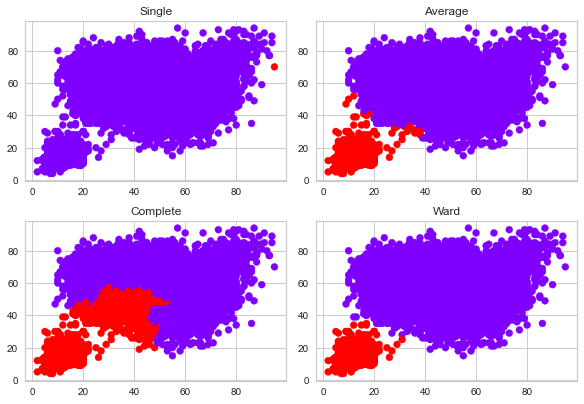

In [12]:
# code to create the four HCA linkage models and scatterplot 
compareLinkage(np.asarray(soccX), 2)

**<span style='background:yellow'>What you see are the comparisons of the 4 linkage types. The linkage types are single, average, complete and ward. As you can probaby see there are a bit similar (except for the single linkage) but not entirely. You might see that all of them have 2 clusters (except for the single linkage). However, the positions of these clusters are all different from each other. The single method shows the clusters as one giant cluster. The reason it performs so differently is that it is a density based method, while the others are more centroid based. The average takes all the pairs of points and computes their similarities and calculate the average of the similarities. Complete shows that some of the first cluster is merged with the bigger cluster. The ward linkage looks the most accurate as it shows the clusters separately.</span>**

Would the k = 2 perhaps again be different? Lets find out. We can use our 'elbowPlot' function here as well.

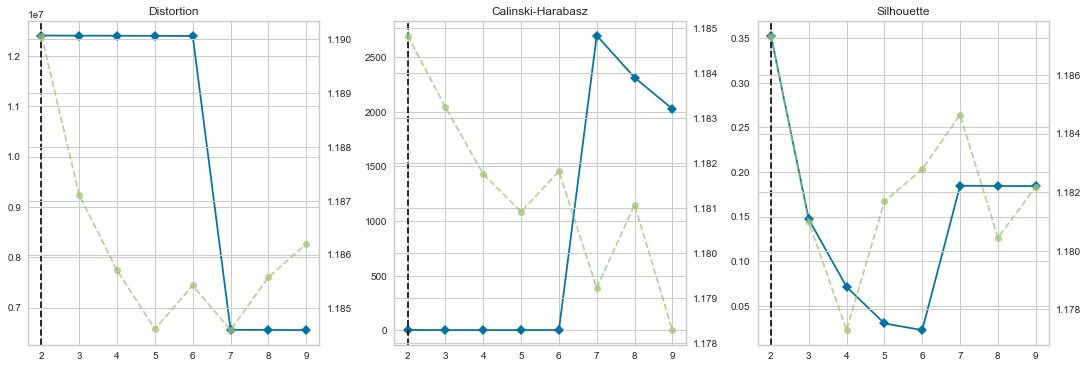

---Single---


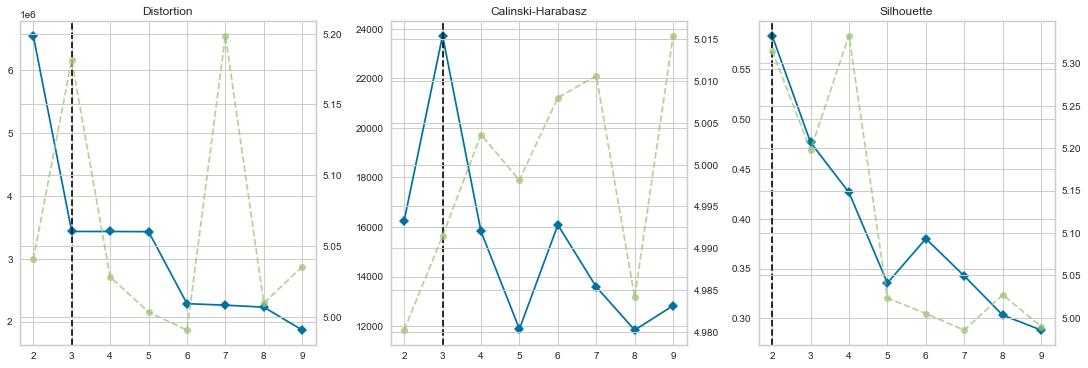

---Average---


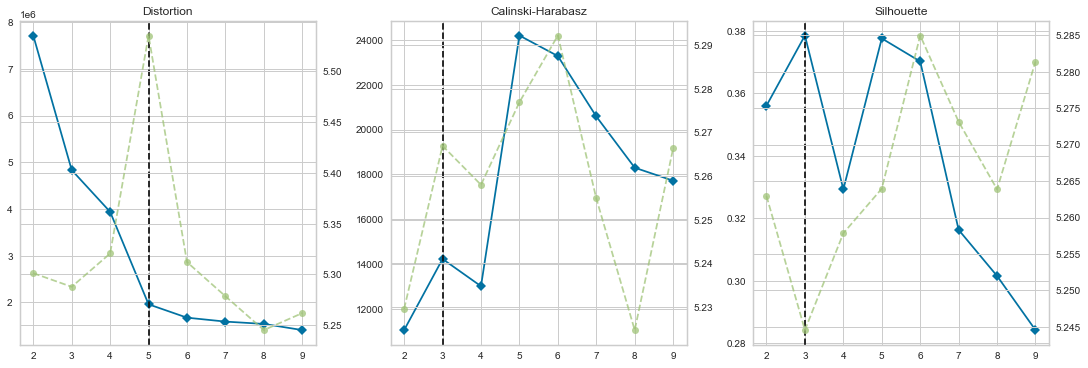

---Complete---


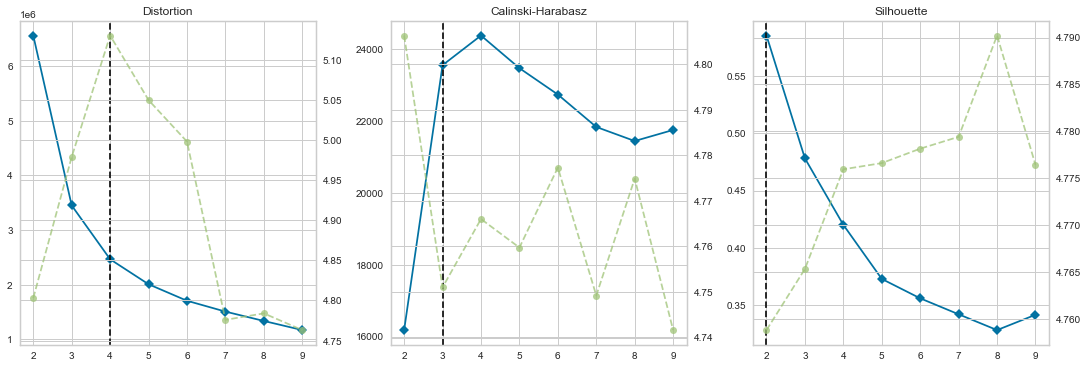

---Ward---


In [13]:
# code to run the elbowPlot four times (ones for each different linkage)

#Single
hierSingle = AgglomerativeClustering(linkage='single', n_clusters=2)    
elbowPlot(soccX, hierSingle, (2,10))
print("---Single---")

#Average
hierAvg = AgglomerativeClustering(linkage='average', n_clusters=2)
elbowPlot(soccX, hierAvg, (2,10))
print("---Average---")

#Complete
hierComplete = AgglomerativeClustering(linkage='complete', n_clusters=2)
elbowPlot(soccX, hierComplete, (2,10))
print("---Complete---")

#Ward
hierWard = AgglomerativeClustering(linkage='ward', n_clusters=2)
elbowPlot(soccX, hierWard, (2,10))
print("---Ward---")


**<span style='background:yellow'>As you can see, there have been several different K recommendations other than 2. For the single linkage we got the k values 2,2 and 2. For Average we got 3,3,2. For Complete, the K values we got were 5,3,3 and finally for ward we got 4,3,2. So in total we got a total of five k=2 values, five k=3 values and finally one k=4 and k=5 values </span>**

A few different k-s are suggested by the elbow plot. Lets see how our HCA performs if we use those.

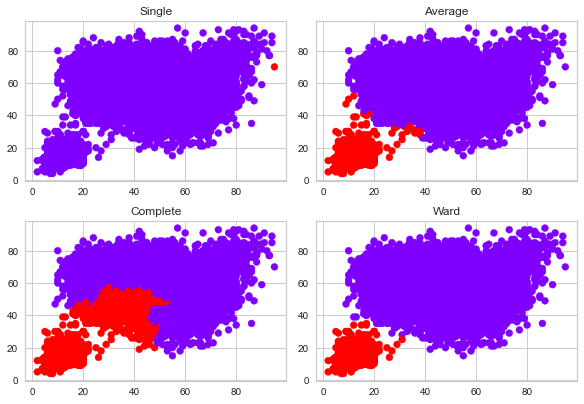

---K=2---


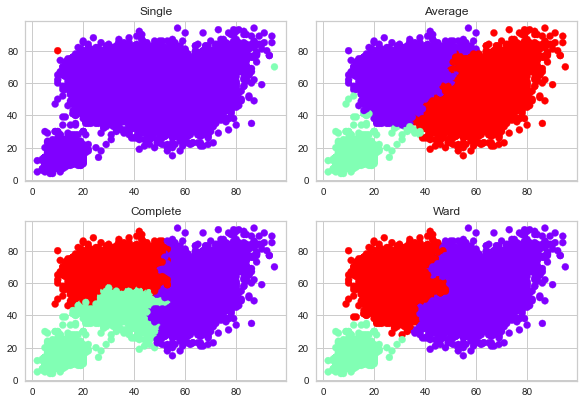

---K=3---


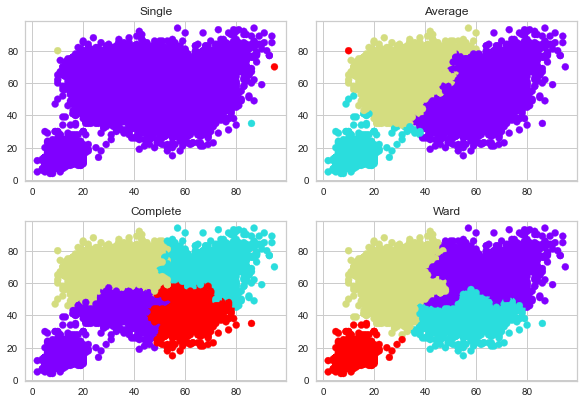

---K=4---


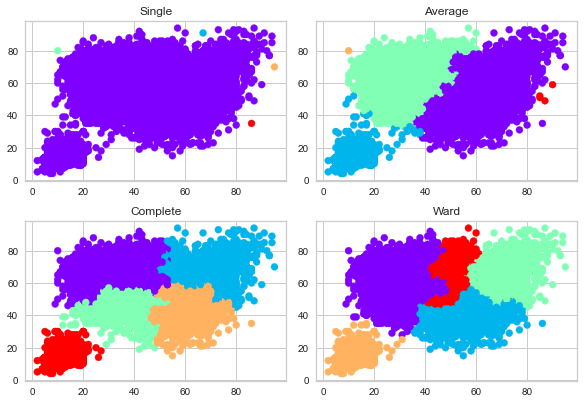

---K=5---


In [14]:
# code to show the four linkages for the different suggested k's from the elbow plots.

# K=2 
compareLinkage(np.asarray(soccX), 2)
print("---K=2---")

# K=3
compareLinkage(np.asarray(soccX), 3)
print("---K=3---")

# K=4
compareLinkage(np.asarray(soccX), 4)
print("---K=4---")

# K=5 
compareLinkage(np.asarray(soccX), 5)
print("---K=5---")

**<span style='background:yellow'>There are 4 linkages for each K value that was recommeded from the elbowplots. The K values chosen were 2,3,4 and 5. You can see that all the K value elbowplots are different from each other because of the number of clusters there are. For example the one we used for k-means is similar to the one shown here. But the three other elbowplots show different number of clusters.</span>**

The dendrogram is also often used. Lets at least produce it once.

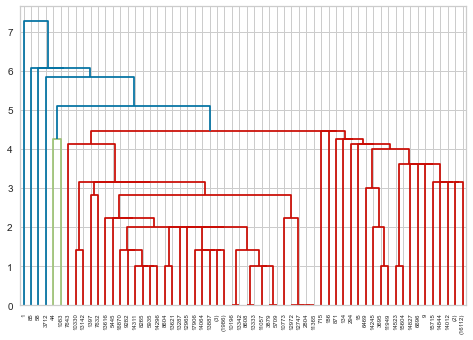

In [15]:
# code to show dendrogram.
Z = linkage(soccX, method='single')

#selecting portion of the data since kernel crashes
dendrogram(Z, p=20, truncate_mode='level')
plt.show()


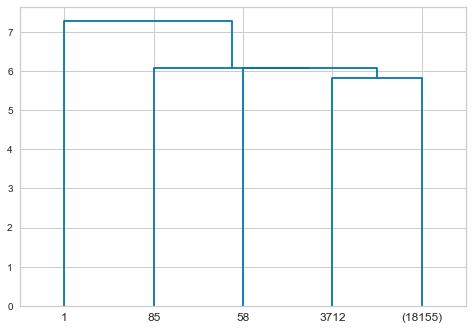

In [16]:
# dendrogram is too large, code to zoom in.
dendrogram(Z, p=3, truncate_mode='level')
plt.show()

Allright, two techniques down, lets move on to the third...

## 1.3. DBSCAN

The third technique discussed was the Density Based Spatial Clustering of Applications with Noise (DBSCAN).

**<span style='background:yellow'>DBSCAN (density-based spatial clustering of applications with noise) is a widely used data clustering algorithm in data mining and machine learning.
DBSCAN clusters points that are close to one other based on a distance measurement (typically Euclidean distance) and a minimal number of points based on a collection of points. It also identifies sites in low-density areas as outliers.</span>**.

This method will require two input parameters. The epsilon and the min number of samples.

As the min number of samples I have chosen for **<span style='background:yellow'>50</span>**.

For the epsilon we can create a visual aid using the nearest neighbors.

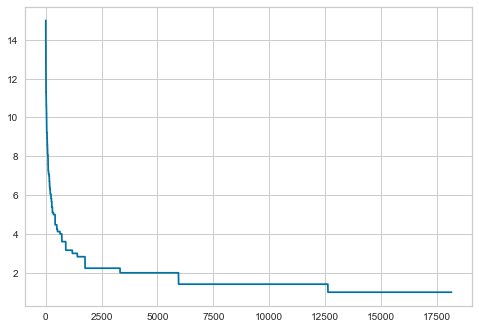

In [17]:
# code to show the nearest neighbors plot with different distances

ns=50 # the minimum number of neighbors
nbrs = NearestNeighbors(n_neighbors=ns).fit(soccX)
distances, indices = nbrs.kneighbors(soccX)
distanceDec = sorted(distances[:,ns-1], reverse=True)
plt.plot(list(range(1,soccX.shape[0]+1)), distanceDec)

**<span style='background:yellow'>What you see is the diagram to show the nearest neighbors and their distances. You can probably see that the elbow starts to take form at 7, we will use that as the epsilon to create and fit into our DBSCAN model. </span>**

Now that we have a min number of points for a neighborhood, and an epsilon we can run the DBSCAN.

In [18]:
# creating and fitting the DBSCAN model.
dbscan = DBSCAN(eps=7, min_samples=50)
dbscan.fit(soccX)

DBSCAN(eps=7, min_samples=50)

Lets look at the results:

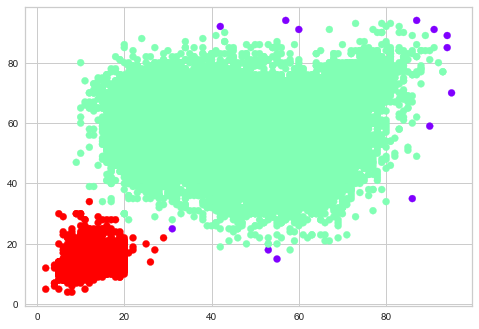

In [19]:
# scatterplot with the clusters
plt.scatter(soccX.iloc[:,0],soccX.iloc[:,1], c=dbscan.labels_, cmap='rainbow')

**<span style='background:yellow'>We see from this diagram that there two main clusters shown clearly. It also looks very accurate on the contrary to the models we have used and shown before. You can clearly see the red cluster and the nearest neighbors as well as the giant cluster with its nearest neighbors. However, there are also strange purple dots displayed as well. Could this mean that they are outliers?</span>**

There was one more technique discussed, the almost perfect HDBSCAN...

## 1.4. HDBSCAN

The fourth technique was the Hierachical Density Based Spatial Clustering of Applications with Noise (HDBSCAN).

**<span style='background:yellow'>Campello, Moulavi, and Sander developed HDBSCAN, which is a clustering algorithm. DBSCAN is extended by transforming it to a hierarchical clustering algorithm and then extracting a flat clustering based on cluster stability.</span>**.

One big advantage of this technique is that it only requires one input parameter: the min samples. We can use the same as from DBSCAN. So lets dive right in.

In [20]:
# creating and fitting the HDBSCAN model.
hdbscanModel = hdbscan.HDBSCAN(min_cluster_size=50, gen_min_span_tree=True)
hdbscanModel.fit(soccX)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=50)

And the result....

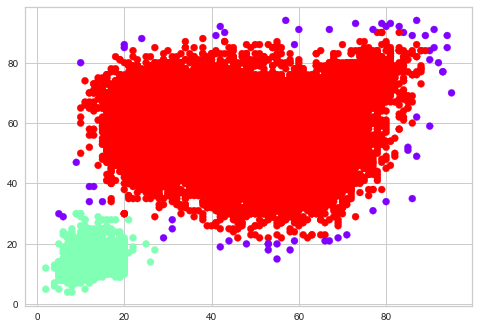

In [21]:
# the scatterplot with the clusters
plt.scatter(soccX.iloc[:,0],soccX.iloc[:,1], c=hdbscanModel.labels_, cmap='rainbow')

**<span style='background:yellow'>The HDBSCAN looks also very similar in comparison to the DBSCAN. However, it seems like it is a little more accurate in determining the two clusters. But there is a difference from the previous models, it is that the red cluster is surrounded by purple datapoints as well. We only saw some of them in DBSCAN but we can see them much more now in the HDBSCAN</span>**

The HDBSCAN actually goes through a few steps: The minimum spanning tree => the dendrogram => the condensed tree.

In the Jupyter Notebook from the lecture, a small function was made to show these. 

In [22]:
# HDBSCANvisuals function

def HDBSCANvisuals():
    # set the plotting stage for later
    plt.figure(figsize=(10,3))

    plt.subplot(131)
    plt.gca().set_title('Min. Spanning Tree')
    hdbscanModel.minimum_spanning_tree_.plot(edge_cmap='viridis', edge_alpha=0.6, node_size=80,edge_linewidth=2)

    plt.subplot(132)
    plt.gca().set_title('Dendrogram')
    hdbscanModel.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

    plt.subplot(133)
    plt.gca().set_title('Condensed Tree')
    hdbscanModel.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

    # Show the results
    plt.show()

So for those who like to see what is going on in these stages:

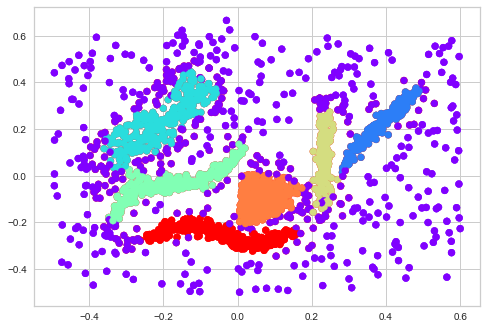

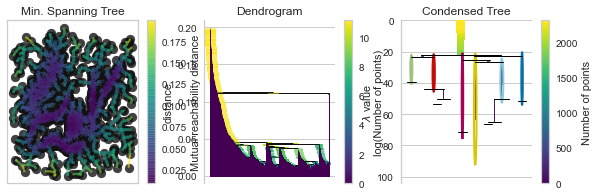

In [23]:
# using the function to show the three visuals.

#using sample set since kernel crashes with the other one
data = np.load('clusterable_data.npy')
dbscan = DBSCAN(eps=0.05, min_samples=20)
dbscan.fit(data)
plt.scatter(data[:,0],data[:,1], c=dbscan.labels_, cmap='rainbow')

hdbscanModel = hdbscan.HDBSCAN(min_cluster_size=15, gen_min_span_tree=True)
hdbscanModel.fit(data)
plt.scatter(data[:,0],data[:,1], c=hdbscanModel.labels_, cmap='rainbow')

HDBSCANvisuals()

## 1.5. Adjusting the Data

We used the unadjusted data, but often a normalization is used. What would the results have been, if we had first normalized our scores using the StandardScaler.

Lets find out.

First transform the data:

In [24]:
# set the scaler
scaler = StandardScaler()
scaler.fit(soccX)
soccXsc = scaler.transform(soccX)

Now lets see all the results again, but using this scaled data.

---Hdb scan model---


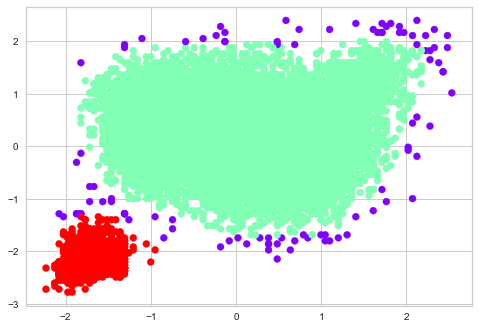

In [25]:
# long code cell with all the different models using the scaled data.

#HDBSCANMODEL
hdbscanModel = hdbscan.HDBSCAN(min_cluster_size=50, gen_min_span_tree=True)
hdbscanModel.fit(soccXsc)
plt.scatter(soccXsc[:,0],soccXsc[:,1], c=hdbscanModel.labels_, cmap='rainbow')
print("---Hdb scan model---")

---db scan model---


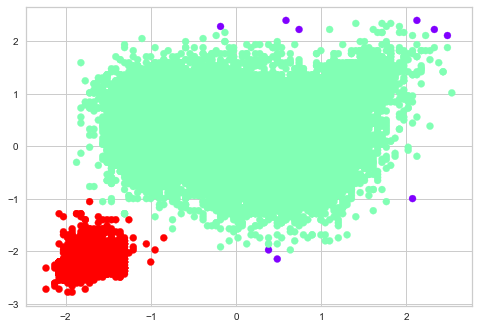

In [26]:
#DBSCANMODEL
dbscan = DBSCAN(eps=0.4, min_samples=50)
dbscan.fit(soccXsc)
plt.scatter(soccXsc[:,0],soccXsc[:,1], c=dbscan.labels_, cmap='rainbow')
print("---db scan model---")

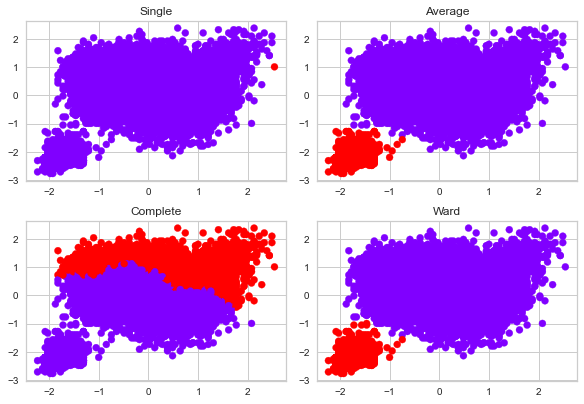

---Hca linkages


In [27]:
#HCA Linkages
compareLinkage(soccXsc, 2)
print("---Hca linkages")

---Kmeans++---


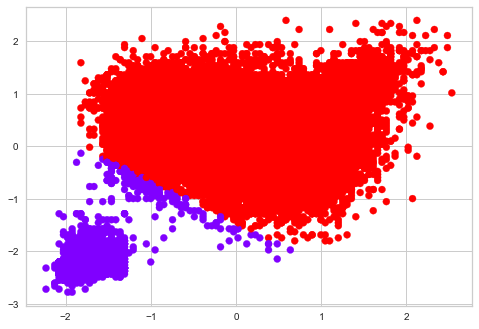

In [28]:
#Kmeans++
kmeans = KMeans(init='k-means++',algorithm='elkan', n_clusters=2, random_state=0)
kmeans.fit(soccXsc)
plt.scatter(soccXsc[:,0],soccXsc[:,1], c=kmeans.labels_, cmap='rainbow')
print("---Kmeans++---")

---Kmeans---


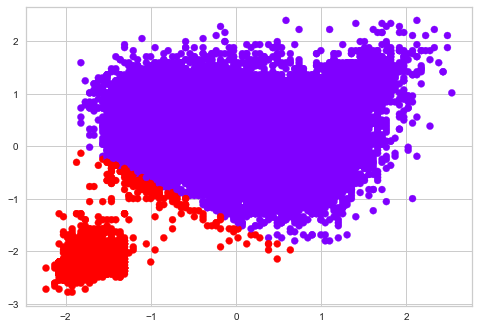

In [29]:
#Kmeans
kmeans = KMeans(init='random', algorithm='elkan', n_clusters=2, random_state=0)
kmeans.fit(soccXsc)
plt.scatter(soccXsc[:,0],soccXsc[:,1], c=kmeans.labels_, cmap='rainbow')
print("---Kmeans---")

**<span style='background:yellow'>The scatterplots that you see above are using the scaled and transformed data. We have created new models using this transformed data. The first one is HDBSCAN which is pretty much similar to the one which doesn't use transformed data. However, for DBSCAN there is some slight differences between using the transformed data and the original data. There are fewer purple dots in the transformed version. The HCA linkage models are a bit different as well. Single is exactly the same since it shows only one cluster. The average and ward linkages are also noticably different as well, they are more accurate in showing the two clusters. And finally the complete linkage is significantly different from using the original data. The last two scatterplots are the kmeans and kmeans++. These seem to be unchanged as well.</span>**

<font size="5"><center>-----Chapters 1 is required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However the template for those chapters is not as extensive as the previous chapters. <br>
    You can select any chapter below the order is not fixed (you can leave the others empty)<br>
    You don't have to use the same dataset for the chapters below. If it helps in clarification you can use another dataset, but then make sure to include it as you submit.
    ----</center></font>

# 2. Improved Visualisation

The basic scatterplot can become a big blur, especially when you have a lot of datapoints.

*note: you can also use the clusterable_data.npy or another dataset, but it has to be one with a LOT of datapoints*

In [30]:
# code to load dataset if not already loaded


If we create a scatterplot of **<span style='background:yellow'>\<your first choosen variable></span>** and **<span style='background:yellow'>\<your second choosen variable></span>**

In [31]:
# code to create the basic scatterplot


It looks like a big blur.

One technique to overcome this, is to use opacity. See for an example: https://i2.wp.com/cmdlinetips.com/wp-content/uploads/2019/04/Scatter_Plot_transparent_with_log_scale_Seaborn_Python.jpeg

Here's a function that can create the scatterplot like this, for a given model and dataset.

In [32]:
# code of a function that takes the data as input and shows the scatterplot with the opacity. The level of opacity can also be a parameter.


Here's an example of using the function:

In [33]:
# code using the function to show the scatterplot with opacity.


Another method to deal with even larger datasets is a heatmap. An example is shown below.

![image heatmap](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRvQZGu7SMVBCh6KIcF7toUqRpak2qWwQNkkhpZzv30hFbwYdDk&usqp=CAU)

This usually requires a Gaussian kernel, and is often slower than the previous methods.

So lets create a function for this as well.

In [34]:
# code of a function that takes the data as input and shows the scatterplot as a heatmap. The color scaling could be an optional parameter.


Here's an example of using the function:

In [35]:
# code using the function to show the heatmap.


# 3. A New Technique

In the Jupyter Notebook from the lecture, we discussed quite a few techniques:

* k-means (with Lloyd and Elkan)
* k-means++ (with Lloyd and Elkan)
* HCA Single linkage
* HCA Complete linkage
* HCA Mean linkage
* HCA Ward linkage
* DBSCAN
* HDBSCAN*

In the appendix there was also:

* Affinity Propagation
* Spectral Clustering
* Mini-batch K-means
* k-medoids
* HCA Centroid linkage
* HCA Median linkage
* Mean Shift
* OPTICS

However, as shown on the slides (near the end) there are a lot more. 

In this chapter the **<span style='background:yellow'>Gaussian Mixtue Models</span>** is discussed.

**<span style='background:yellow'>A Gaussian Mixture is a function made up of many Gaussians, each of which is identified by the numbers k 1,..., K, where K is the number of clusters in our dataset. The following parameters make up each Gaussian k in the mixture:
Its center is defined by a mean.
Its width is defined by the covariance. In a multivariate setting, this would be equivalent to the dimensions of an ellipsoid.
A mixing probability that determines the size of the Gaussian function. A Gaussian mixture model (GMM) tries to identify the optimum model for every input dataset by combining multi-dimensional Gaussian probability distributions. GMMs can be used in the same way as k-means to locate clusters in the simplest scenario. So there are some similarities between kmeans and Gausian Mixture Models.</span>**

In [36]:
#importing sklearn gaussianmixture
from sklearn.mixture import GaussianMixture

#using the transformed soccer dataset for this section
X = np.array(soccXsc)
gm = GaussianMixture(n_components=2, random_state=0).fit(X)
labels = gm.predict(X)

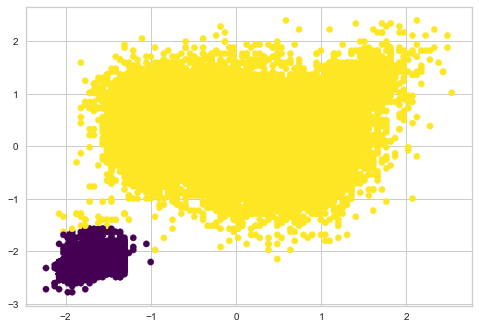

In [37]:
# Scatterplot
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

# 4. Categorical Data

As with the clustering, the categorical data is a special case. In this chapter we'll describe one way to cluster using categorical data.

**<span style='background:yellow'>\<explain this new technique in detail. What does it do? How does it in principal work? You probably need a few cells for this></span>**

In [38]:
# code to create and fit the model (perhaps another dataset is also required?)


In [39]:
# code to show the result in a scatterplot with the clusters.


# 5. Elbow as a Number
The elbowPlot gives a nice visual tool. But I'd like to have the resulting k-value as a number, so I can use it as an input parameter for some loops over different models.

I couldn't find a method to extract the result from the KElbowVisualizer. So we'll have to create something ourselves. Perhaps 'from kneed import KneeLocator' can help here...

Below is a function that will find the knee/elbow point for each of the three metrics, and returns the results as an array.

In [40]:
# code for the above described function


In [41]:
# code as example to use the function
